# Exploring type of Crime Incidents during certain times of day/week

Exploring the San Francisco incidents during the summer 2014 dataset. We're going try to find day of week hour of the day trends within each of the category of incidents provided. To accomplish we first we explore the data provided to see if there is any processing required to find the answers.

In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
print "First record:"
print df.head(n=1)

First record:
   IncidntNum Category            Descript DayOfWeek        Date   Time  \
0   140734311    ARSON  ARSON OF A VEHICLE    Sunday  08/31/2014  23:50   

  PdDistrict Resolution                    Address           X          Y  \
0    BAYVIEW       NONE  LOOMIS ST / INDUSTRIAL ST -122.405647  37.738322   

                                Location            PdId  
0  (37.7383221869053, -122.405646994567)  14073431126031  


To be able to answer questions about day of week trends we have what we need ... but for time we'll have to simplify things a bit and we'll go with just splitting the hour off and lean on that which gives us 24 different points in the day which should suffice to identify trends. We'll split up the categories into category_ids for easier handling later.

In [49]:
df['hour'] = df['Time'].apply(lambda x: int(x.split(':')[0]))
# df['month'] = df['Date'].apply(lambda x: int(x.split('/')[0]))
# reversing days for display
days = df.DayOfWeek.unique()[::-1]
df['day_number'] = df['DayOfWeek'].apply(lambda x: np.where(days==x)[0][0])
categories=df.Category.unique()
df['category_id'] = df['Category'].apply(lambda x: np.where(categories==x)[0][0])
plt.style.use('fivethirtyeight')


Looking at the total number of incidents spread through out the days of the week there is hardly any noticeable difference between weekend and weekdays.

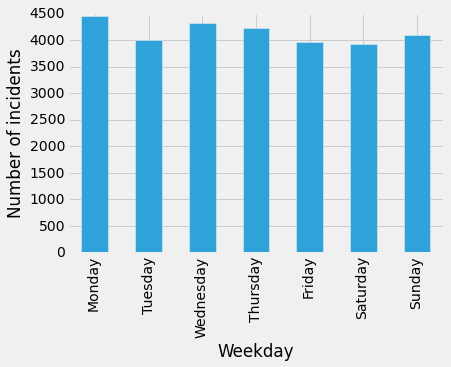

In [27]:
subset = df[['hour','DayOfWeek']]
groupby = subset.groupby(['DayOfWeek'])
table = groupby.count().unstack(level=-2)
table.plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6], days, rotation='vertical')
plt.xlabel("Weekday")
plt.ylabel("Number of incidents")
plt.show()

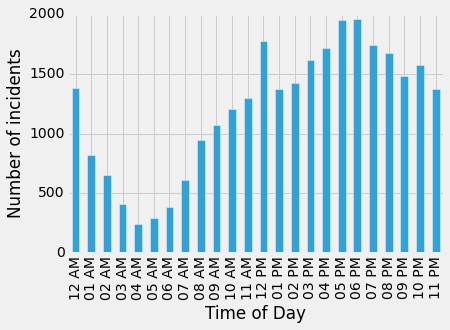

In [28]:
subset = df[['hour','day_number']]
groupby = subset.groupby(['hour'])
table = groupby.count().unstack()
table.plot(kind='bar')
hours = [(dt.time(i).strftime('%I %p')) for i in range(24)]
plt.xticks(range(24), hours, rotation='vertical')
plt.xlabel("Time of Day")
plt.ylabel("Number of incidents")
plt.show()

When we do the same time of day there is a trend of activity starting early morning and then increases until it peeks round 6pm and then starts tapering of as the night settles. There is a small anomaly for the noon period which might have something to do with lunch hour.

To decide which category to explore we chart the distribution of the categories. We put a threshold on the categories with fewer than 400 incidents to have this be more convenient. 

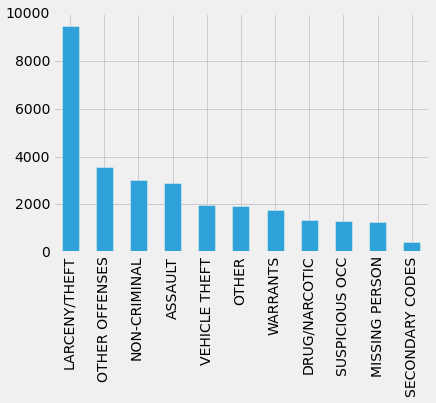

In [46]:
df['Category_cat'] = df['Category'].astype('category')
counts = df['Category_cat'].value_counts()
count_df = counts.to_frame()
df['category_limited'] = df['Category'].apply(lambda x: x if count_df.loc[x][0][0] > 400 else 'OTHER')
df['category_limited'].astype('category').value_counts().plot(kind='bar')
plt.show()

This bar plot shows that Larceny/Theft is the far most common incident that happened during the summer of 2014 in San Francisco.

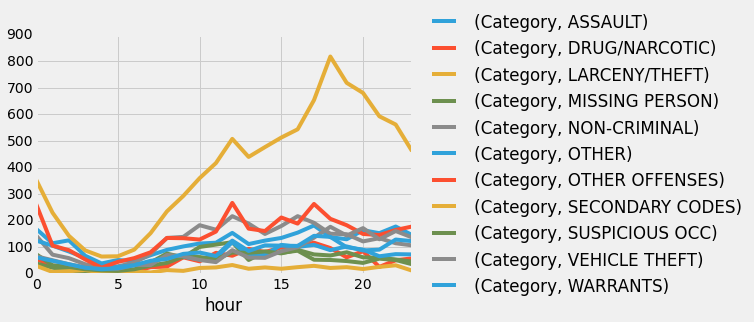

In [38]:
subset = df[['hour','category_limited', 'Category']]
table = subset.groupby(['hour', 'category_limited']).count().unstack()
table.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

This chart demonstrates that Larceny/Theft is most common during the late evening. And it is clear that the increase during those hours is more than with other categories of incidents.

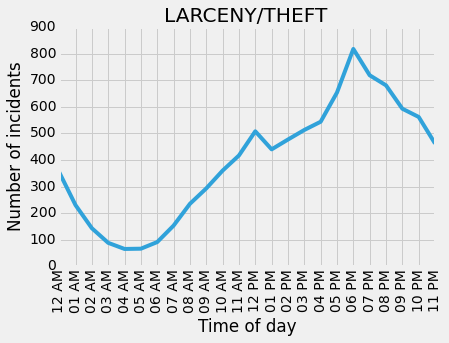

In [45]:
subset = df[['hour','Category']]
larceny_theft = subset[(subset['Category'] == 'LARCENY/THEFT')]
larceny_theft.groupby(['hour']).count().plot(kind='line', legend = False)
hours = [(dt.time(i).strftime('%I %p')) for i in range(24)]
plt.xticks(range(24), hours, rotation='vertical')
plt.xlabel("Time of day")
plt.ylabel("Number of incidents")
plt.title('LARCENY/THEFT')
plt.show()

Isolating the category gives a more detailed picture of when it peaks around 7pm. Now lets look at time of the week.

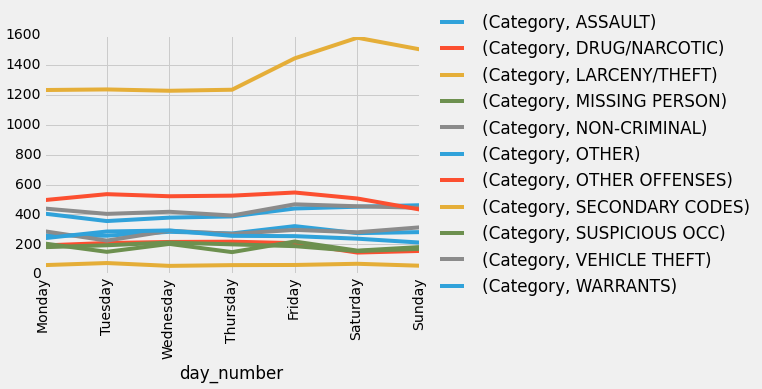

In [51]:
subset = df[['day_number','category_limited', 'Category']]
table = subset.groupby(['day_number', 'category_limited']).count().unstack()
table.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0,1,2,3,4,5,6], days, rotation='vertical')
plt.show()

Again there is a trend regarding Larceny/Theft ... looks like weekend is the time when there is increased Larceny/Theft activity.

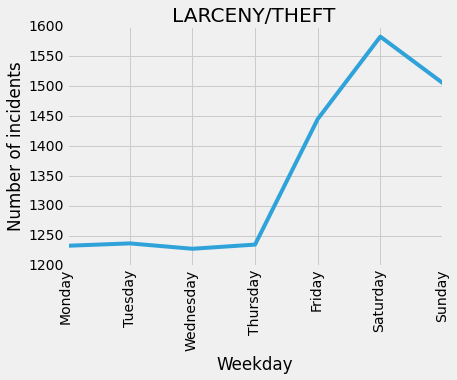

In [52]:
subset = df[['day_number','Category']]
larceny_theft = subset[(subset['Category'] == 'LARCENY/THEFT')]
larceny_theft.groupby(['day_number']).count().plot(kind='line', legend = False)
plt.xticks([0,1,2,3,4,5,6], days, rotation='vertical')
plt.xlabel("Weekday")
plt.ylabel("Number of incidents")
plt.title('LARCENY/THEFT')
plt.show()

This trend becomes more evident if Larceny/Theft is isolated.

Conclusion: Larceny/Theft activity is increased during nights and weekends.